<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from google.colab import files
uploaded = files.upload()

Saving heart_dataset_train_all.csv to heart_dataset_train_all (3).csv


In [29]:
import pandas as pd

df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [32]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,1
cp,1
trestbps,1
chol,2
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [33]:
df = df.dropna()

In [34]:
df.shape

(270, 14)

In [35]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [36]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [38]:
import numpy as np
import torch

seed = 42

# 固定 NumPy 的隨機種子
np.random.seed(seed)

# 固定 PyTorch 的隨機種子
torch.manual_seed(seed)  # 設定 CPU 隨機種子
torch.cuda.manual_seed(seed)  # 設定單張 GPU 隨機種子
torch.cuda.manual_seed_all(seed)  # 設定所有 GPU 隨機種子（如果有多張）

# 讓 CuDNN 的計算保持確定性
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [39]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [40]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [41]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [42]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [43]:
# Check your GPU status.
!nvidia-smi

Thu Mar 27 12:37:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   75C    P0             33W /   70W |     160MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [45]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import torch.nn as nn

# Define 9 combinations of (learning rate, eta_min)
param_grid = [
    (1e-4, 0), (1e-4, 1e-5), (1e-4, 1e-3),
    (1e-3, 0), (1e-3, 1e-5), (1e-3, 1e-3),
    (1e-2, 0), (1e-2, 1e-5), (1e-2, 1e-3)
]

# Training settings
epochs = 100

# Containers for all results across hyperparameter combinations
all_train_accuracies = []
all_val_accuracies = []
all_train_losses = []
all_val_losses = []

# Iterate over each combination of (lr, eta_min)
for lr, eta_min in param_grid:
    print(f"\nTraining with learning rate: {lr}, eta_min: {eta_min}")

    model = Model()  # Reinitialize the model for each combination
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=eta_min)

    best_val_loss = float('inf')
    best_val_acc = -1

    # Store performance for this particular setting
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in tqdm(range(epochs)):
        # Training phase
        model.train()
        total_loss, train_correct, total_train_samples = 0, 0, 0

        for features, labels in train_loader:
            features, labels = features.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            train_correct += (outputs.argmax(-1) == labels).sum().item()
            total_train_samples += labels.size(0)

        lr_scheduler.step()
        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = 100. * train_correct / total_train_samples

        # Validation phase
        model.eval()
        total_val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for features, labels in val_loader:
                features, labels = features.cuda(), labels.cuda()
                outputs = model(features)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                correct += (outputs.argmax(-1) == labels).sum().item()
                total += labels.size(0)

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = 100. * correct / total

        # Save model after each epoch with a unique name based on lr and eta_min
        model_path = f'model_classification_lr{lr}_eta{eta_min}.pth'
        torch.save(model.state_dict(), model_path)

        # Print progress for this epoch
        print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, '
              f'Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%, '
              f'Saving model to {model_path}')

        # Store performance metrics
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

    # Store all results for this hyperparameter combination
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)



Training with learning rate: 0.0001, eta_min: 0


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 0.9252, Train acc: 59.79%, Val loss: 0.6232, Val acc: 65.43%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 2/100, Train loss: 0.6916, Train acc: 61.90%, Val loss: 0.6500, Val acc: 70.37%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 3/100, Train loss: 0.6542, Train acc: 68.78%, Val loss: 0.6114, Val acc: 64.20%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 4/100, Train loss: 0.6087, Train acc: 65.61%, Val loss: 0.6990, Val acc: 60.49%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 5/100, Train loss: 0.6450, Train acc: 65.08%, Val loss: 0.5998, Val acc: 64.20%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 6/100, Train loss: 0.5798, Train acc: 71.96%, Val loss: 0.6174, Val acc: 69.14%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 7/100, Train loss: 0.5770, Train acc: 72.49%, Val loss: 0.5919, Val acc: 64.20%, Saving model to model_classification_lr0.0001_eta0.pth
Epoch 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 0.9228, Train acc: 61.90%, Val loss: 0.6689, Val acc: 62.96%, Saving model to model_classification_lr0.0001_eta1e-05.pth
Epoch 2/100, Train loss: 0.7582, Train acc: 68.78%, Val loss: 0.9121, Val acc: 60.49%, Saving model to model_classification_lr0.0001_eta1e-05.pth
Epoch 3/100, Train loss: 0.8324, Train acc: 59.79%, Val loss: 0.7435, Val acc: 61.73%, Saving model to model_classification_lr0.0001_eta1e-05.pth
Epoch 4/100, Train loss: 0.7125, Train acc: 67.72%, Val loss: 0.7351, Val acc: 64.20%, Saving model to model_classification_lr0.0001_eta1e-05.pth
Epoch 5/100, Train loss: 0.7336, Train acc: 68.25%, Val loss: 0.6440, Val acc: 64.20%, Saving model to model_classification_lr0.0001_eta1e-05.pth
Epoch 6/100, Train loss: 0.7013, Train acc: 65.61%, Val loss: 0.6459, Val acc: 66.67%, Saving model to model_classification_lr0.0001_eta1e-05.pth
Epoch 7/100, Train loss: 0.6729, Train acc: 68.78%, Val loss: 0.6102, Val acc: 74.07%, Saving model to model_classification_

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 8.4821, Train acc: 45.50%, Val loss: 2.0879, Val acc: 45.68%, Saving model to model_classification_lr0.0001_eta0.001.pth
Epoch 2/100, Train loss: 2.2050, Train acc: 49.74%, Val loss: 3.4932, Val acc: 54.32%, Saving model to model_classification_lr0.0001_eta0.001.pth
Epoch 3/100, Train loss: 2.4856, Train acc: 54.50%, Val loss: 0.9476, Val acc: 53.09%, Saving model to model_classification_lr0.0001_eta0.001.pth
Epoch 4/100, Train loss: 1.2658, Train acc: 44.44%, Val loss: 1.2393, Val acc: 46.91%, Saving model to model_classification_lr0.0001_eta0.001.pth
Epoch 5/100, Train loss: 0.9327, Train acc: 51.32%, Val loss: 1.0604, Val acc: 54.32%, Saving model to model_classification_lr0.0001_eta0.001.pth
Epoch 6/100, Train loss: 0.8809, Train acc: 53.44%, Val loss: 0.7683, Val acc: 54.32%, Saving model to model_classification_lr0.0001_eta0.001.pth
Epoch 7/100, Train loss: 0.6721, Train acc: 60.85%, Val loss: 0.6084, Val acc: 64.20%, Saving model to model_classification_

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 6.3020, Train acc: 49.74%, Val loss: 2.5610, Val acc: 46.91%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 2/100, Train loss: 2.3153, Train acc: 51.32%, Val loss: 3.5232, Val acc: 46.91%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 3/100, Train loss: 2.1969, Train acc: 57.14%, Val loss: 1.1689, Val acc: 66.67%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 4/100, Train loss: 1.4297, Train acc: 60.85%, Val loss: 1.4765, Val acc: 61.73%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 5/100, Train loss: 1.2021, Train acc: 66.67%, Val loss: 0.8340, Val acc: 65.43%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 6/100, Train loss: 0.7847, Train acc: 64.55%, Val loss: 0.9121, Val acc: 60.49%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 7/100, Train loss: 0.6395, Train acc: 71.96%, Val loss: 0.7089, Val acc: 64.20%, Saving model to model_classification_lr0.001_eta0.pth
Epoch 8/100, 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 5.0173, Train acc: 49.21%, Val loss: 2.1758, Val acc: 46.91%, Saving model to model_classification_lr0.001_eta1e-05.pth
Epoch 2/100, Train loss: 2.0035, Train acc: 55.03%, Val loss: 0.7012, Val acc: 70.37%, Saving model to model_classification_lr0.001_eta1e-05.pth
Epoch 3/100, Train loss: 1.3446, Train acc: 60.32%, Val loss: 1.0211, Val acc: 61.73%, Saving model to model_classification_lr0.001_eta1e-05.pth
Epoch 4/100, Train loss: 1.0195, Train acc: 62.43%, Val loss: 1.0602, Val acc: 61.73%, Saving model to model_classification_lr0.001_eta1e-05.pth
Epoch 5/100, Train loss: 0.8552, Train acc: 69.84%, Val loss: 0.6777, Val acc: 67.90%, Saving model to model_classification_lr0.001_eta1e-05.pth
Epoch 6/100, Train loss: 0.8154, Train acc: 65.61%, Val loss: 1.0704, Val acc: 58.02%, Saving model to model_classification_lr0.001_eta1e-05.pth
Epoch 7/100, Train loss: 0.9042, Train acc: 62.96%, Val loss: 0.8445, Val acc: 60.49%, Saving model to model_classification_lr0.00

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 6.0197, Train acc: 49.74%, Val loss: 2.6701, Val acc: 45.68%, Saving model to model_classification_lr0.001_eta0.001.pth
Epoch 2/100, Train loss: 1.6638, Train acc: 55.03%, Val loss: 2.6178, Val acc: 50.62%, Saving model to model_classification_lr0.001_eta0.001.pth
Epoch 3/100, Train loss: 1.4240, Train acc: 61.38%, Val loss: 1.5922, Val acc: 55.56%, Saving model to model_classification_lr0.001_eta0.001.pth
Epoch 4/100, Train loss: 1.1943, Train acc: 62.96%, Val loss: 0.8717, Val acc: 72.84%, Saving model to model_classification_lr0.001_eta0.001.pth
Epoch 5/100, Train loss: 1.1479, Train acc: 59.79%, Val loss: 1.0824, Val acc: 60.49%, Saving model to model_classification_lr0.001_eta0.001.pth
Epoch 6/100, Train loss: 0.9594, Train acc: 65.08%, Val loss: 1.5595, Val acc: 58.02%, Saving model to model_classification_lr0.001_eta0.001.pth
Epoch 7/100, Train loss: 1.5036, Train acc: 58.20%, Val loss: 0.7905, Val acc: 66.67%, Saving model to model_classification_lr0.00

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 48.1556, Train acc: 50.79%, Val loss: 9.1222, Val acc: 54.32%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 2/100, Train loss: 4.1264, Train acc: 53.97%, Val loss: 1.7398, Val acc: 54.32%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 3/100, Train loss: 1.2801, Train acc: 58.20%, Val loss: 1.0291, Val acc: 60.49%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 4/100, Train loss: 0.8193, Train acc: 61.90%, Val loss: 0.9734, Val acc: 59.26%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 5/100, Train loss: 0.6713, Train acc: 65.61%, Val loss: 0.6352, Val acc: 72.84%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 6/100, Train loss: 0.5697, Train acc: 73.02%, Val loss: 0.7826, Val acc: 59.26%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 7/100, Train loss: 0.6351, Train acc: 65.08%, Val loss: 0.6150, Val acc: 71.60%, Saving model to model_classification_lr0.01_eta0.pth
Epoch 8/100, Train 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 41.2076, Train acc: 52.91%, Val loss: 12.2171, Val acc: 45.68%, Saving model to model_classification_lr0.01_eta1e-05.pth
Epoch 2/100, Train loss: 5.7354, Train acc: 44.97%, Val loss: 0.6988, Val acc: 65.43%, Saving model to model_classification_lr0.01_eta1e-05.pth
Epoch 3/100, Train loss: 1.7699, Train acc: 51.85%, Val loss: 1.3147, Val acc: 53.09%, Saving model to model_classification_lr0.01_eta1e-05.pth
Epoch 4/100, Train loss: 0.7746, Train acc: 61.38%, Val loss: 0.6973, Val acc: 58.02%, Saving model to model_classification_lr0.01_eta1e-05.pth
Epoch 5/100, Train loss: 0.6524, Train acc: 61.38%, Val loss: 0.6571, Val acc: 59.26%, Saving model to model_classification_lr0.01_eta1e-05.pth
Epoch 6/100, Train loss: 0.5823, Train acc: 68.25%, Val loss: 0.6072, Val acc: 67.90%, Saving model to model_classification_lr0.01_eta1e-05.pth
Epoch 7/100, Train loss: 0.5750, Train acc: 70.90%, Val loss: 0.6181, Val acc: 61.73%, Saving model to model_classification_lr0.01_eta

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 41.4828, Train acc: 50.79%, Val loss: 21.5783, Val acc: 45.68%, Saving model to model_classification_lr0.01_eta0.001.pth
Epoch 2/100, Train loss: 8.4393, Train acc: 49.74%, Val loss: 2.6530, Val acc: 54.32%, Saving model to model_classification_lr0.01_eta0.001.pth
Epoch 3/100, Train loss: 1.2578, Train acc: 57.67%, Val loss: 0.7851, Val acc: 53.09%, Saving model to model_classification_lr0.01_eta0.001.pth
Epoch 4/100, Train loss: 0.7909, Train acc: 56.08%, Val loss: 0.6804, Val acc: 60.49%, Saving model to model_classification_lr0.01_eta0.001.pth
Epoch 5/100, Train loss: 0.6141, Train acc: 66.67%, Val loss: 0.6323, Val acc: 65.43%, Saving model to model_classification_lr0.01_eta0.001.pth
Epoch 6/100, Train loss: 0.6353, Train acc: 67.72%, Val loss: 0.6119, Val acc: 64.20%, Saving model to model_classification_lr0.01_eta0.001.pth
Epoch 7/100, Train loss: 0.6041, Train acc: 67.20%, Val loss: 0.6681, Val acc: 61.73%, Saving model to model_classification_lr0.01_eta

#### Visualizing the model performance

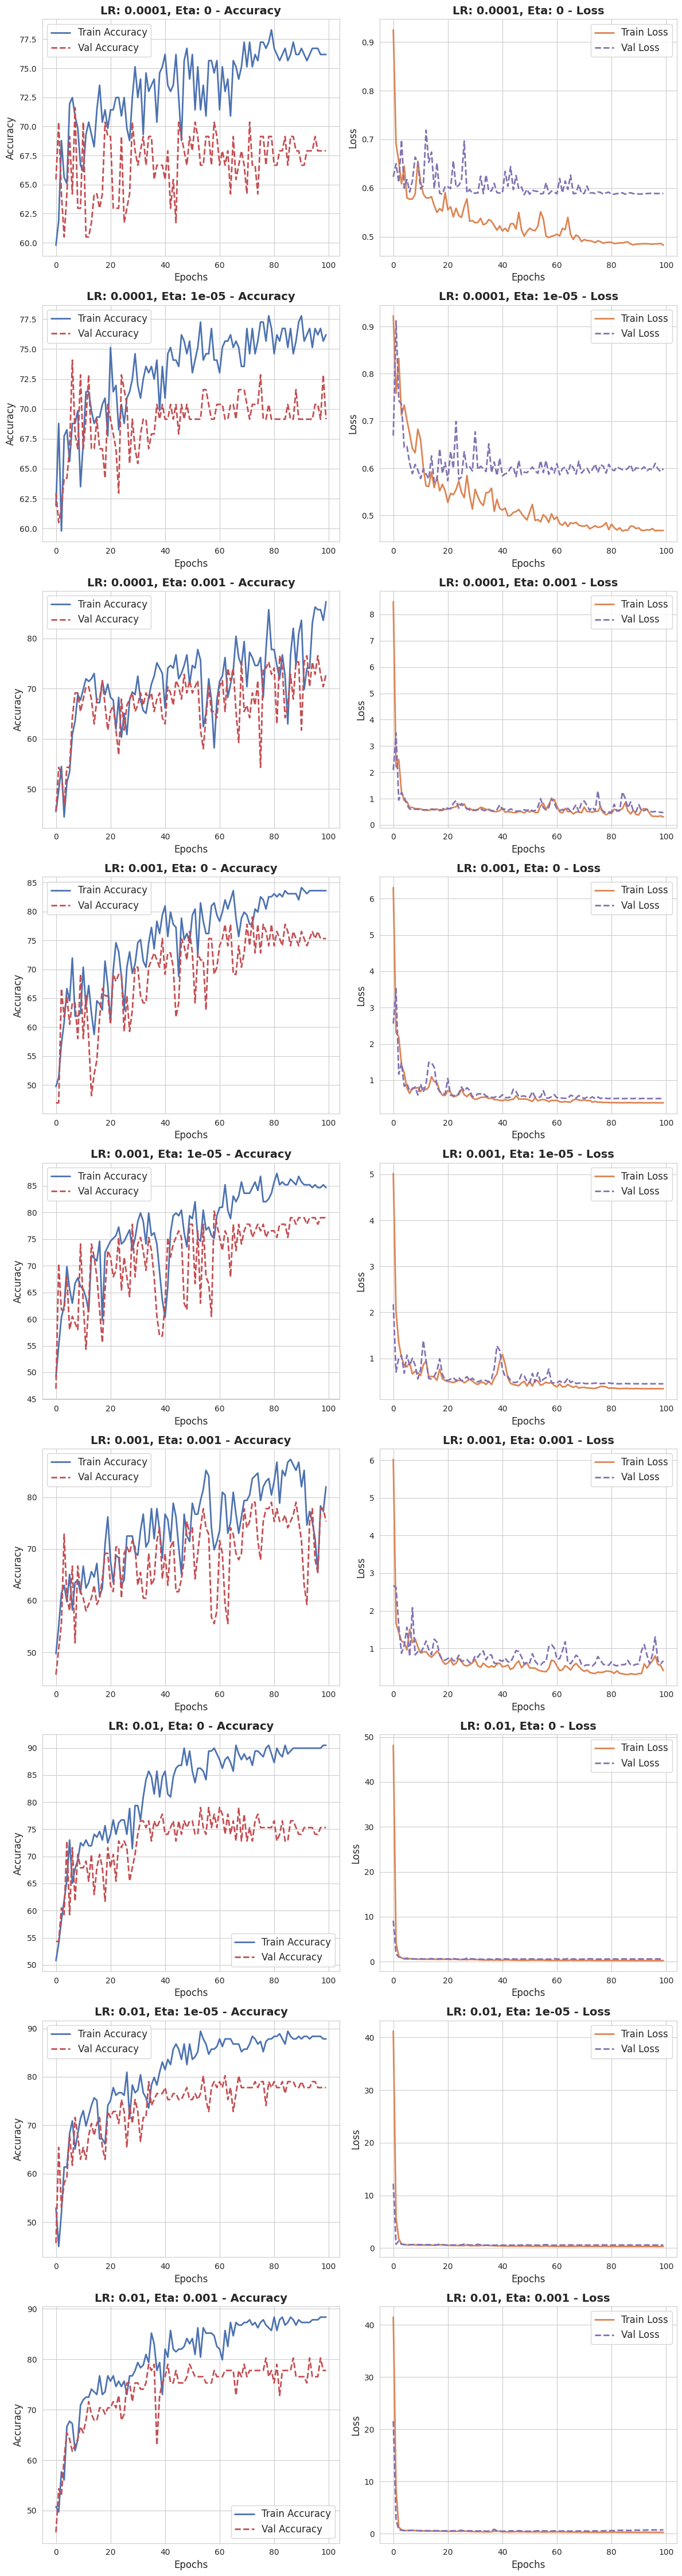

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用專業配色
sns.set_style("whitegrid")  # 設定網格風格
colors = sns.color_palette("deep")  # 取 Seaborn 的專業調色板

# 設定圖表大小，每組超參數佔一行，兩列分別是 Accuracy 和 Loss
num_experiments = len(param_grid)
fig, ax = plt.subplots(num_experiments, 2, figsize=(12, 5 * num_experiments))

# 如果只有一組超參數，確保 ax 是 2D 結構
if num_experiments == 1:
    ax = [ax]  # 轉換成列表，確保可以用 ax[i][j] 的方式索引

# 逐行畫出不同超參數的結果
for i, (lr, eta_min) in enumerate(param_grid):
    # 畫出 Training 和 Validation Accuracy
    ax[i][0].plot(all_train_accuracies[i], color=colors[0], linestyle='-', linewidth=2, label='Train Accuracy')
    ax[i][0].plot(all_val_accuracies[i], color=colors[3], linestyle='--', linewidth=2, label='Val Accuracy')
    ax[i][0].set_title(f'LR: {lr}, Eta: {eta_min} - Accuracy', fontsize=14, fontweight='bold')
    ax[i][0].set_xlabel('Epochs', fontsize=12)
    ax[i][0].set_ylabel('Accuracy', fontsize=12)
    ax[i][0].legend(fontsize=12)

    # 畫出 Training 和 Validation Loss
    ax[i][1].plot(all_train_losses[i], color=colors[1], linestyle='-', linewidth=2, label='Train Loss')
    ax[i][1].plot(all_val_losses[i], color=colors[4], linestyle='--', linewidth=2, label='Val Loss')
    ax[i][1].set_title(f'LR: {lr}, Eta: {eta_min} - Loss', fontsize=14, fontweight='bold')
    ax[i][1].set_xlabel('Epochs', fontsize=12)
    ax[i][1].set_ylabel('Loss', fontsize=12)
    ax[i][1].legend(fontsize=12)

# 調整佈局，避免重疊
plt.tight_layout()
plt.show()


## D. Evaluating Your Trained Model

In [47]:
from google.colab import files
uploaded = files.upload()

Saving heart_dataset_test.csv to heart_dataset_test (1).csv


In [48]:
# read test file
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [49]:
test_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [50]:
test_data = test_data.values
test_data.shape

(31, 14)

In [51]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [52]:
import torch

# 定義 9 種 (learning rate, eta_min) 組合
param_grid = [
    (1e-4, 0), (1e-4, 1e-5), (1e-4, 1e-3),
    (1e-3, 0), (1e-3, 1e-5), (1e-3, 1e-3),
    (1e-2, 0), (1e-2, 1e-5), (1e-2, 1e-3)
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for lr, eta_min in param_grid:
    print(f"\nEvaluating model with learning rate: {lr}, eta_min: {eta_min}")

    # 重新初始化模型並載入訓練好的權重
    model = Model().to(device)
    model_path = f'model_classification_lr{lr}_eta{eta_min}.pth'
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_correct = 0
    test_total = 0
    test_loss = 0.0  # 初始化測試損失累計

    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)

            outputs = model(features)
            loss = criterion(outputs, labels)  # 計算該 batch 的 loss
            test_loss += loss.item() * labels.size(0)  # 乘以 batch 大小，統計總 loss

            predicted = outputs.argmax(dim=-1)
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

    # 計算測試集的平均 loss 和準確率
    avg_test_loss = test_loss / test_total
    test_accuracy = 100. * test_correct / test_total

    print(f'Test Loss: {avg_test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.2f}%')



Evaluating model with learning rate: 0.0001, eta_min: 0
Test Loss: 0.6123
Test Accuracy: 67.74%

Evaluating model with learning rate: 0.0001, eta_min: 1e-05
Test Loss: 0.6252
Test Accuracy: 64.52%

Evaluating model with learning rate: 0.0001, eta_min: 0.001
Test Loss: 0.4347
Test Accuracy: 87.10%

Evaluating model with learning rate: 0.001, eta_min: 0
Test Loss: 0.5235
Test Accuracy: 67.74%

Evaluating model with learning rate: 0.001, eta_min: 1e-05
Test Loss: 0.4752
Test Accuracy: 74.19%

Evaluating model with learning rate: 0.001, eta_min: 0.001
Test Loss: 0.5287
Test Accuracy: 64.52%

Evaluating model with learning rate: 0.01, eta_min: 0
Test Loss: 0.4026
Test Accuracy: 83.87%

Evaluating model with learning rate: 0.01, eta_min: 1e-05
Test Loss: 0.3976
Test Accuracy: 83.87%

Evaluating model with learning rate: 0.01, eta_min: 0.001
Test Loss: 0.3935
Test Accuracy: 80.65%


In [27]:
import torch
import pandas as pd
from tabulate import tabulate

# 定義 9 種 (learning rate, eta_min) 組合
param_grid = [
    (1e-4, 0), (1e-4, 1e-5), (1e-4, 1e-3),
    (1e-3, 0), (1e-3, 1e-5), (1e-3, 1e-3),
    (1e-2, 0), (1e-2, 1e-5), (1e-2, 1e-3)
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 儲存所有結果
all_results = []

for lr, eta_min in param_grid:


    # 重新初始化模型並載入權重
    model = Model().to(device)
    model_path = f'model_classification_lr{lr}_eta{eta_min}.pth'
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_correct = 0
    test_total = 0
    test_loss = 0.0  # 初始化測試損失累計

    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)

            outputs = model(features)
            loss = criterion(outputs, labels)  # 計算該 batch 的 loss
            test_loss += loss.item() * labels.size(0)  # 乘以 batch 大小，統計總 loss

            predicted = outputs.argmax(dim=-1)
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

    # 計算測試集的平均 loss 和準確率
    avg_test_loss = test_loss / test_total
    test_accuracy = 100. * test_correct / test_total

    # 記錄最後一個 epoch 的訓練與驗證數據
    final_train_loss = all_train_losses[param_grid.index((lr, eta_min))][-1]
    final_train_acc = all_train_accuracies[param_grid.index((lr, eta_min))][-1]
    final_val_loss = all_val_losses[param_grid.index((lr, eta_min))][-1]
    final_val_acc = all_val_accuracies[param_grid.index((lr, eta_min))][-1]

    # 儲存結果
    all_results.append([
        lr, eta_min, final_train_loss, final_train_acc,
        final_val_loss, final_val_acc, avg_test_loss, test_accuracy
    ])

# 轉換為 DataFrame
columns = ["Learning Rate", "Eta Min", "Train Loss", "Train Accuracy",
           "Validation Loss", "Validation Accuracy", "Test Loss", "Test Accuracy"]
metrics_table = pd.DataFrame(all_results, columns=columns)

# 印出表格
print("\nMetrics Summary:")
print(tabulate(metrics_table, headers='keys', tablefmt='pretty'))



Metrics Summary:
+---+---------------+---------+---------------------+-------------------+--------------------+---------------------+---------------------+-------------------+
|   | Learning Rate | Eta Min |     Train Loss      |  Train Accuracy   |  Validation Loss   | Validation Accuracy |      Test Loss      |   Test Accuracy   |
+---+---------------+---------+---------------------+-------------------+--------------------+---------------------+---------------------+-------------------+
| 0 |    0.0001     |   0.0   | 0.4812110811471939  | 77.77777777777777 | 0.5782053470611572 |  69.1358024691358   | 0.6122574714883682  | 67.74193548387096 |
| 1 |    0.0001     |  1e-05  | 0.4965597093105316  | 77.77777777777777 | 0.5879602034886678 |  71.60493827160494  | 0.6252281002459987  | 64.51612903225806 |
| 2 |    0.0001     |  0.001  | 0.9645089854796728  | 70.37037037037037 | 0.8525981903076172 |  66.66666666666667  | 0.43470697909323197 | 87.09677419354838 |
| 3 |     0.001     |   0.0 